In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
Expert = widgets.Dropdown(options=[e for e in range(2,9)],value=2,description='Experts:',disabled=False)
display(Expert)

Dropdown(description='Experts:', options=(2, 3, 4, 5, 6, 7, 8), value=2)

In [3]:
Criteria = widgets.Dropdown(options=[c for c in range(2,11)],value=3,description='Criteria:',disabled=False,)
display(Criteria)

Dropdown(description='Criteria:', index=1, options=(2, 3, 4, 5, 6, 7, 8, 9, 10), value=3)

In [4]:
accordion = widgets.Accordion(children=[widgets.Text() for cr in range(Criteria.value)])
for cr in range(Criteria.value):
    accordion.set_title(cr, 'Criterion'+str(cr+1))
accordion

Accordion(children=(Text(value=''), Text(value=''), Text(value=''), Text(value=''), Text(value='')), _titles={…

In [19]:
tab_content = [['value' for cr in range(Criteria.value)] for ex in range(Expert.value)]
children = [[widgets.Text(description=name) for name in tab_content[ex]] for ex in range(Expert.value)]
tab = [widgets.Tab() for ex in range(Expert.value)]
for ex in range(Expert.value):
    tab[ex].children = children[ex]
    for cr in range(Criteria.value):
        tab[ex].set_title(cr, accordion.children[cr].value)
    display(tab[ex])

In [96]:
def f(x):
    return x

plot = interactive(f, x=['radar','boxplot'])
display(plot)

interactive(children=(Dropdown(description='x', options=('radar', 'boxplot'), value='radar'), Output()), _dom_…

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import seaborn as sns

# Set data
Se = pd.Series({'group': ['Expert ' + str(ex+1) for ex in range(Expert.value)]})
df = pd.DataFrame({k:[tab[ex].children[index].value for ex in range(Expert.value)] for index, k in enumerate(keys)}, \
    index=[Se.values[0][ex] for ex in range(Expert.value)])

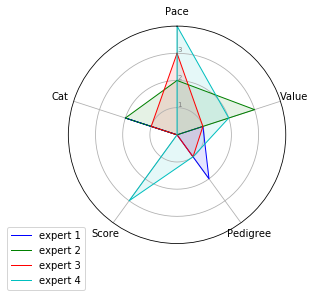

In [104]:
if plot.children[0].value == 'radar':
        # ------- PART 1: Create background
    
    # number of variable
    categories=list(df)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3], ["1","2","3"], color="grey", size=7)
    plt.ylim(0,4)

    colors = ['b','g','r','c','m','y','k','w']

    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    
    for ex in range(Expert.value):
        values=df.iloc[ex].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, colors[ex], linewidth=1, linestyle='solid', label="expert "+str(ex+1))
        ax.fill(angles, values, colors[ex], alpha=0.1)
        ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()
else:
    ax = sns.boxplot(data=df, orient="h", palette="Set1")